# Assignment 2, Problem 4

In [7]:
import numpy as np
import pandas as pd
wines = pd.read_csv('winequality-red.csv', sep = ';', header=0)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(wines.iloc[:,0:11], wines.iloc[:,11], test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)
def concat_ones(X):
    # Add a 1 in front of every training sample for the bias term.
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)
class LR:
    def __init__(self, learn_bias=False):
        self.beta = None
        self.learn_bias = learn_bias

    def fit(self, X, y):
        if self.learn_bias:
            X = concat_ones(X)
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X_test):
        if self.learn_bias:
            X_test = concat_ones(X_test)
        if self.beta is None:
            raise ValueError('Fit the LR model before predicting.')
        return X_test @ self.beta
    
model = LR(learn_bias=True)
model.fit(X_train, y_train)

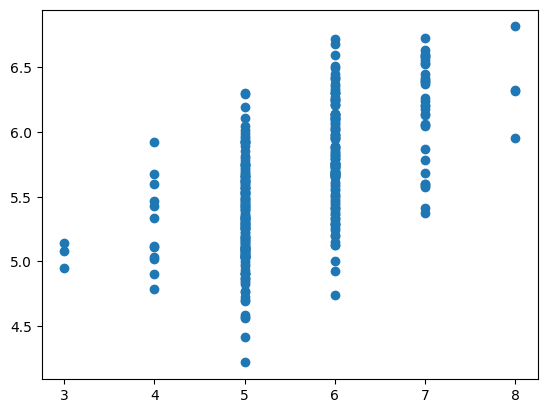

In [32]:
plt.scatter(y_val, model.predict(X_val))
plt.show()

This graph should have the points for each rating along the x-axis be centered at that same number on the y-axis. That is to say, the more variance the less accurate the prediction is, and if the center of the distribution for the number is not centered around the same number, then the model is not performing well. We see in our plot that the points are mostly centered around 5-6.5, which makes sense because the true values are mostly 5, 6, or 7.

In [51]:
E_w_test = sum(0.5*np.square(model.predict(X_test) - y_test))
rms_test = np.sqrt(2*E_w_test / len(X_test))

E_w_train = sum(0.5*np.square(model.predict(X_train) - y_train))
rms_train = np.sqrt(2*E_w_train / len(X_train))

print('RMS for train and test are:', rms_train,'and', rms_test)


RMS for train and test are: 0.6468753617066719 and 0.6465631434487168


## Least-Mean-Squares Algorithm

In [56]:
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)
def lms (Xc, yc, step, iterations=100):
    weights = np.zeros(11)
    errs = []
    X = normalize(np.array(Xc))
    y = np.array(yc)
    samples, variables = X.shape

    for k in range(iterations):
        total_error = 0
        for i in range(samples):
            x_i = X[i, :]
            y_i = y[i]
            y_pred = np.dot(weights, x_i) 
            error = y_i - y_pred 
            weights += step * error * x_i  
            total_error += error**2
        
    errs.append(total_error / samples)
    
    return weights, errs

weights_train, MSE_train = lms(X_train, y_train, step = 0.01, iterations=5000)
weights_test, MSE_test = lms(X_test, y_test, step = 0.01, iterations=5000)


In [62]:
rms_lms_train = np.sqrt(2*MSE_train[0] / len(X_train))
rms_lms_test = np.sqrt(2*MSE_test[0] / len(X_test))
print('RMS for train and test are:', rms_lms_train,'and', rms_lms_test)

RMS for train and test are: 0.2687494484035236 and 0.4685973816195043
